# Unsupervised Learning Assignment-2

Your task in this assignment is to:

1. Understand the two datasets provided and combine them in a meaningful way to make one dataset with useful features [1 mark]

2. Do appropriate EDA and preprocessing on the dataset you formed in part 1 [2 mark]

3. Cluster the data using Agglomerative clustering and find the appropriate number of clusters for the data using dendrogram [2 marks]

3. After finding the best clustering obtained for your data, try to interpret some/all of the clusters and derive some domain-specific insights out of the results [1 mark]

## Import Libraries
**Import pandas,seaborn, and the required libraries to work on this project.**

In [112]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

# Lets read the first file and check top 5 data

In [113]:
# Read input file
df = pd.read_csv("post_details.csv")
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0


# Lets read the second file and check top 5 data

In [114]:
# Read input file
df = pd.read_csv("post_reaction_details.csv")
df.head(5)

,status_id,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,432,92,3,1,1,0
1,246675545449582_1649426988507757,150,0,0,0,0,0
2,246675545449582_1648730588577397,204,21,1,1,0,0
3,246675545449582_1648576705259452,111,0,0,0,0,0
4,246675545449582_1645700502213739,204,9,0,0,0,0


# Lets merge the file

In [115]:
df = pd.concat(map(pd.read_csv, ['post_details.csv', 'post_reaction_details.csv']), ignore_index=True)
df.head(5)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529.0,512.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227.0,236.0,57.0,NaN,NaN,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# EDA and Basic Data Preprocessing and Preparation [Marks:2]

# Lets get the data information

In [116]:
print('='*50)
print("\nData Information\n")
print('='*50)
df.info()


Data Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         13994 non-null  object 
 1   status_type       6997 non-null   object 
 2   status_published  6997 non-null   object 
 3   num_reactions     6997 non-null   float64
 4   num_comments      6997 non-null   float64
 5   num_shares        6997 non-null   float64
 6   num_likes         6997 non-null   float64
 7   num_loves         6997 non-null   float64
 8   num_wows          6997 non-null   float64
 9   num_hahas         6997 non-null   float64
 10  num_sads          6997 non-null   float64
 11  num_angrys        6997 non-null   float64
dtypes: float64(9), object(3)
memory usage: 1.3+ MB


In [117]:
# From above we can see , we have 12 coloums, float and object data type, we need to handle this before feeding data in algo

# Lets get the data shape by using shape method

In [118]:
print('='*20)
print("Data shape")
print('='*20)
print(df.shape)

Data shape
(13994, 12)


In [119]:
# From above we can see we have 13994 rows and 12 features in pur data set

In [120]:
# Generate descriptive statistics.
# Checking Min, Max, Mean, Std for all the columns
df.describe(percentiles=[.10, .25, .5, .75])

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,224.951979,225.613977,40.269973,209.899814,12.755181,1.253251,0.698156,0.232671,0.110190
std,452.930082,892.863091,132.064065,439.595761,40.112024,8.726772,3.971462,1.481312,0.688678
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,6.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


# Getting the all columns

In [121]:
column=df.select_dtypes(include=['object','float64'])
for col in column:
    display(df[col].value_counts())

246675545449582_1649696485147474     2
725980084255106_831056807080766      2
725980084255106_821310368055410      2
725980084255106_821715704681543      2
725980084255106_822109934642120      2
                                    ..
246675545449582_264081010375702      2
246675545449582_264089710374832      2
246675545449582_264092513707885      2
246675545449582_264166627033807      2
1050855161656896_1050858841656528    2
Name: status_id, Length: 6997, dtype: int64

photo     4242
video     2333
status     359
link        63
Name: status_type, dtype: int64

11/19/2017 1:51    2
3/25/2018 2:34     2
12/18/2017 4:30    2
9/16/2017 7:55     2
8/3/2017 9:22      2
                  ..
9/6/2012 8:43      1
9/6/2012 9:01      1
9/6/2012 9:16      1
9/6/2012 23:17     1
9/10/2016 10:30    1
Name: status_published, Length: 6911, dtype: int64

1.0       131
2.0       124
14.0      121
0.0       121
3.0       116
         ... 
2826.0      1
2032.0      1
2154.0      1
1997.0      1
415.0       1
Name: num_reactions, Length: 1067, dtype: int64

0.0       2119
1.0        564
2.0        361
3.0        308
4.0        249
          ... 
1727.0       1
1794.0       1
2257.0       1
1671.0       1
4472.0       1
Name: num_comments, Length: 993, dtype: int64

0.0      3907
1.0       813
2.0       314
3.0       162
4.0       108
         ... 
454.0       1
508.0       1
510.0       1
549.0       1
219.0       1
Name: num_shares, Length: 501, dtype: int64

1.0       128
2.0       127
0.0       126
14.0      124
12.0      120
         ... 
2072.0      1
2826.0      1
2032.0      1
2154.0      1
953.0       1
Name: num_likes, Length: 1044, dtype: int64

0.0      4226
1.0       607
2.0       279
3.0       205
4.0       127
         ... 
326.0       1
385.0       1
329.0       1
188.0       1
157.0       1
Name: num_loves, Length: 229, dtype: int64

0.0      5295
1.0       701
2.0       344
3.0       211
4.0       134
         ... 
25.0        1
104.0       1
138.0       1
32.0        1
23.0        1
Name: num_wows, Length: 65, dtype: int64

0.0      5880
1.0       388
2.0       223
3.0       149
4.0        99
5.0        64
6.0        34
8.0        24
7.0        20
9.0        17
10.0       14
13.0       13
11.0       10
12.0        9
14.0        7
22.0        5
15.0        5
17.0        5
18.0        4
16.0        3
24.0        2
19.0        2
26.0        1
28.0        1
25.0        1
33.0        1
43.0        1
32.0        1
157.0       1
29.0        1
20.0        1
97.0        1
91.0        1
76.0        1
50.0        1
100.0       1
48.0        1
57.0        1
102.0       1
23.0        1
40.0        1
21.0        1
Name: num_hahas, dtype: int64

0.0     6399
1.0      317
2.0      113
3.0       63
4.0       37
5.0       14
8.0       12
6.0       11
10.0       6
7.0        6
19.0       3
17.0       2
13.0       2
23.0       2
28.0       1
22.0       1
51.0       1
21.0       1
37.0       1
11.0       1
46.0       1
12.0       1
14.0       1
9.0        1
Name: num_sads, dtype: int64

0.0     6577
1.0      275
2.0       71
3.0       35
4.0       17
5.0        9
6.0        4
8.0        3
31.0       1
12.0       1
7.0        1
19.0       1
10.0       1
9.0        1
Name: num_angrys, dtype: int64

# Data Cleaning

In [122]:
#Checking for null Values

In [123]:
#Check the null values
df.isnull().sum()

status_id              0
status_type         6997
status_published    6997
num_reactions       6997
num_comments        6997
num_shares          6997
num_likes           6997
num_loves           6997
num_wows            6997
num_hahas           6997
num_sads            6997
num_angrys          6997
dtype: int64

# It is clear that there is no null values

# In order to calculate distances for hierarchical cluestering, all features must be in numeric format.
# Since some of the data is in string format, we need to convert it into numeric, lets do that now, I will be converting status_type and status_published as numeirc

In [124]:
df['status_type'] = pd.to_numeric(df['status_type'],errors='coerce')
df['status_published'] = pd.to_numeric(df['status_published'],errors='coerce')

In [125]:
# Checking for Duplicates
print("Number of duplicate values in the dataset is : ", df.duplicated().sum())

Number of duplicate values in the dataset is :  0


In [126]:
# now again lets checking column wise null values
df.isnull().any()
df.isnull().sum()

status_id               0
status_type         13994
status_published    13994
num_reactions        6997
num_comments         6997
num_shares           6997
num_likes            6997
num_loves            6997
num_wows             6997
num_hahas            6997
num_sads             6997
num_angrys           6997
dtype: int64

In [127]:
# checking overall null value count
df.isnull().sum().sum()

90961

# We can see we have huge null vaalues after converting data into numeric. we will handle iy by filling it with zero

In [128]:
df.fillna(0,inplace = True)

In [129]:
# checking overall null value count
df.isnull().sum().sum()

0

In [130]:
# After handling the null value we can see we have zero null values

# Outliers

In [131]:
#Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions.
#let's first visualize our data and decide on what to do with the outliers

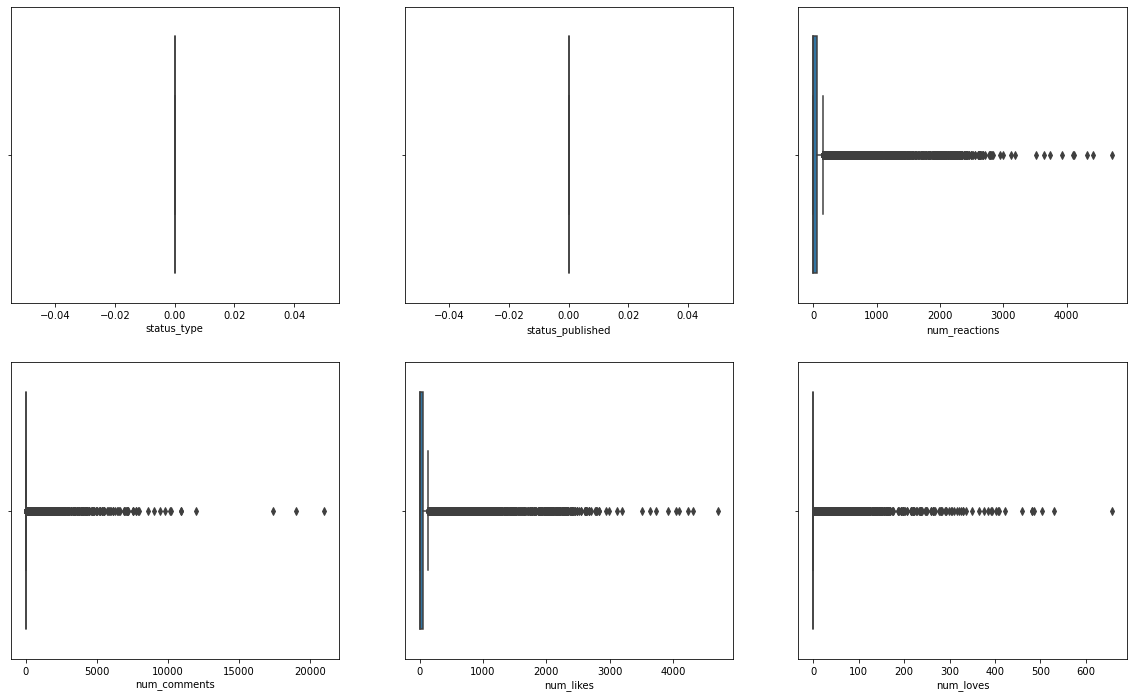

In [132]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df['status_type'])
plt.subplot(2,3,2)
sns.boxplot(df['status_published'])
plt.subplot(2,3,3)
sns.boxplot(df['num_reactions'])
plt.subplot(2,3,4)
sns.boxplot(df['num_comments'])
plt.subplot(2,3,5)
sns.boxplot(df['num_likes'])
plt.subplot(2,3,6)
sns.boxplot(df['num_loves'])

plt.show()



<AxesSubplot:xlabel='num_angrys'>

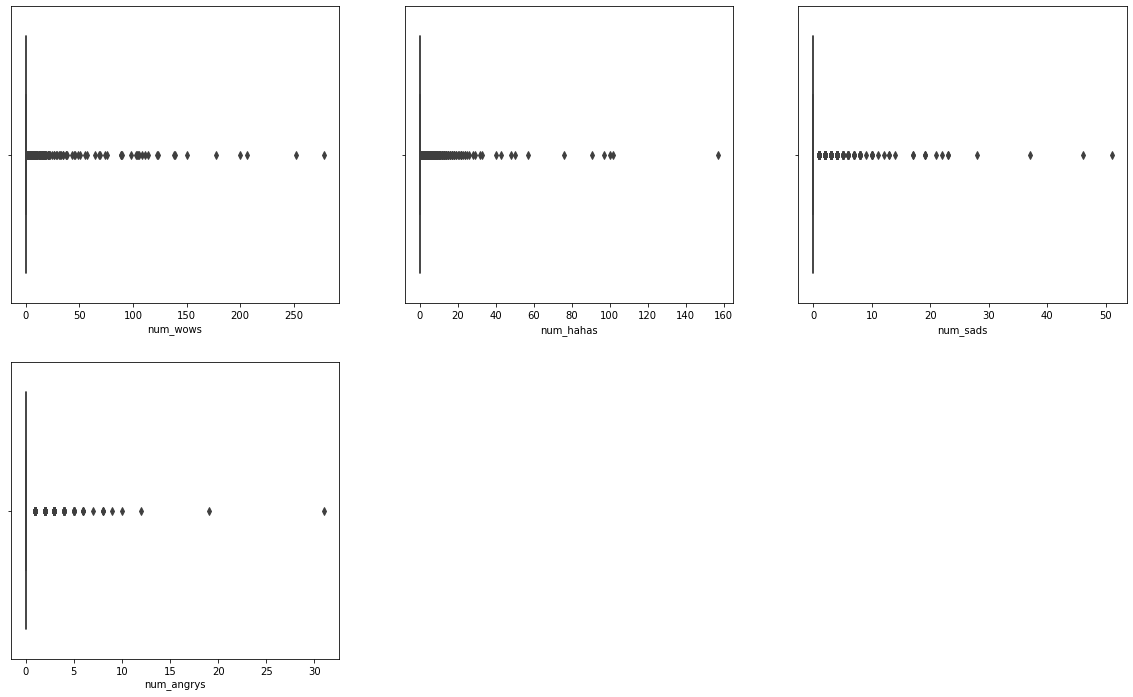

In [133]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df['num_wows'])
plt.subplot(2,3,2)
sns.boxplot(df['num_hahas'])
plt.subplot(2,3,3)
sns.boxplot(df['num_sads'])
plt.subplot(2,3,4)
sns.boxplot(df['num_angrys'])

# We can see there are many outliers but we will not remove it as it can contaains some important information

# First, let's try to undertand status_type distribution


In [134]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled

array([[0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

plt.figure(figsize=(12,6),dpi=100)
sns.histplot(data=data_scaled,x="num_reactions",color="red")
plt.title("status_type Distribution ")
plt.show()

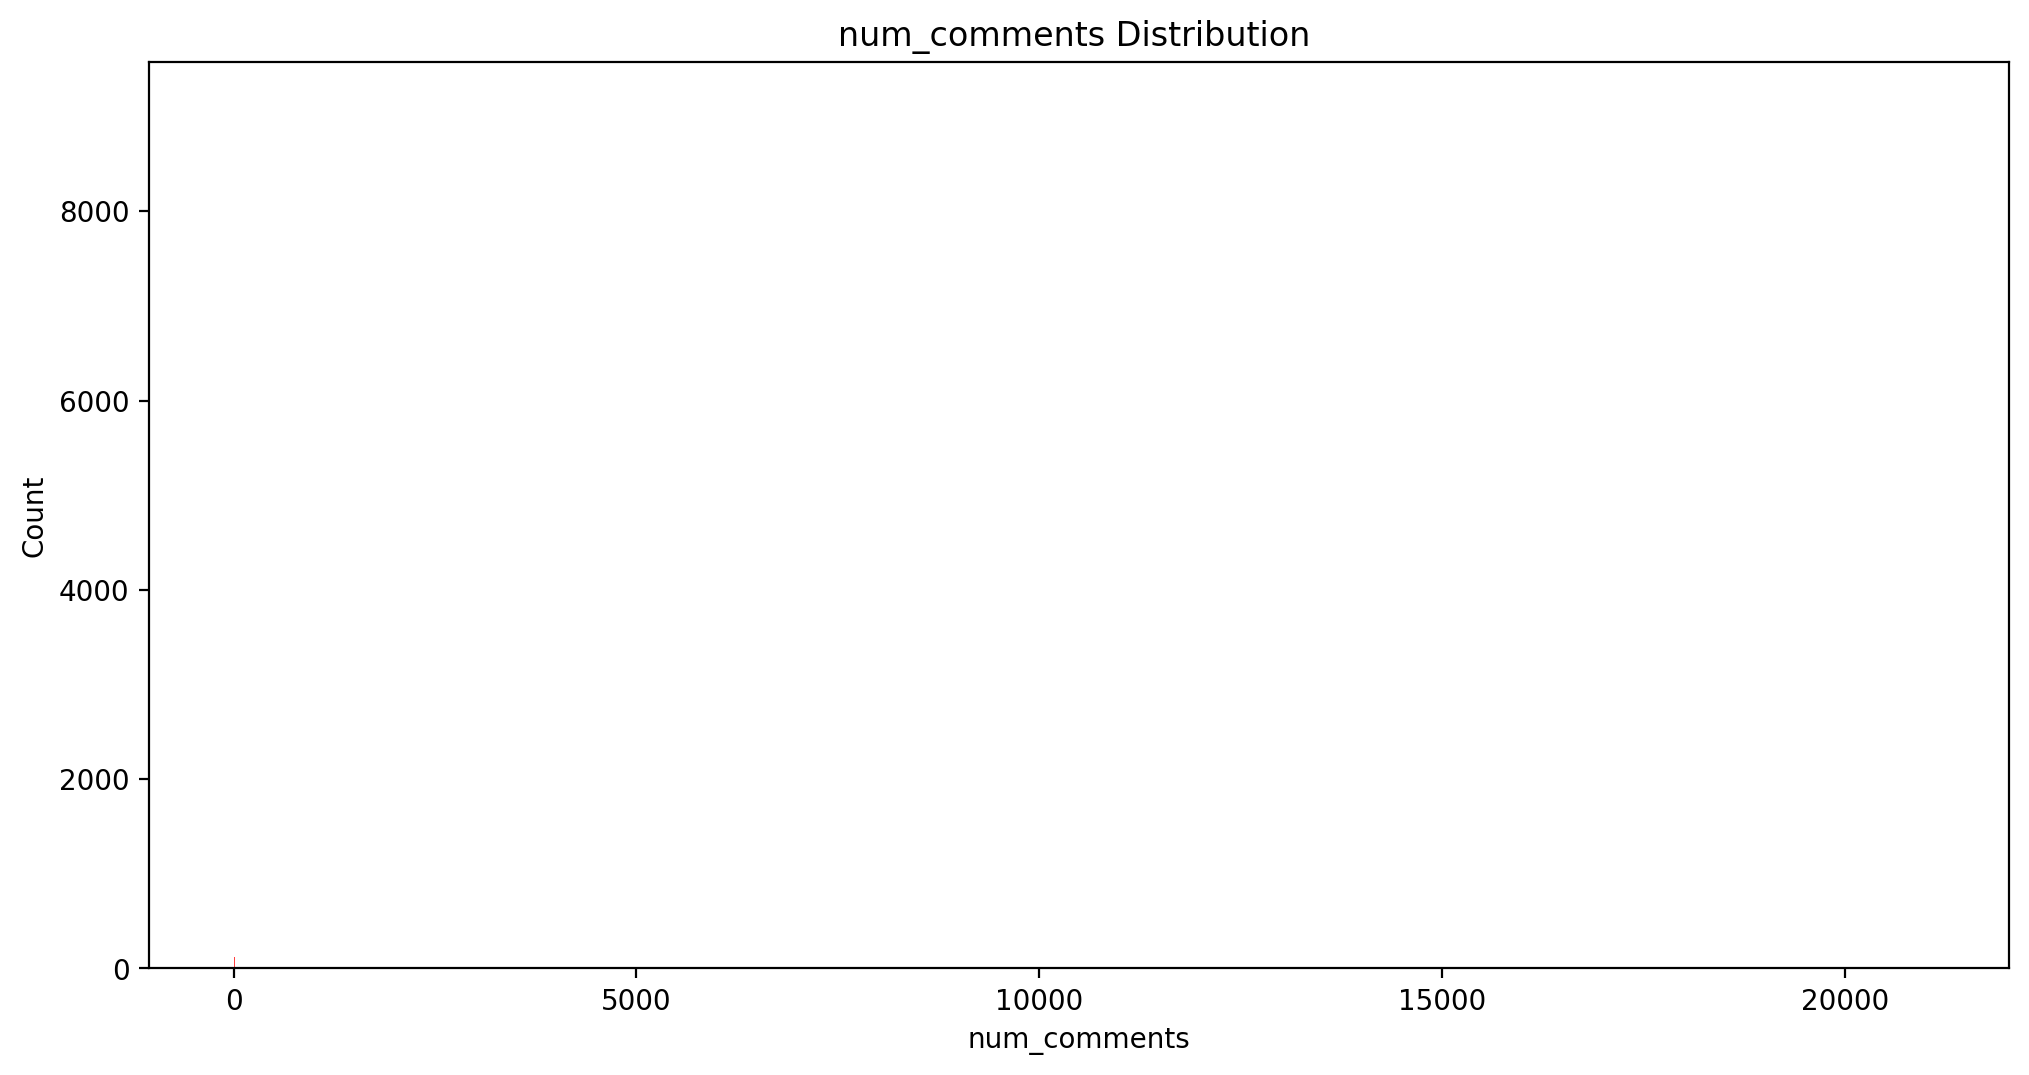

In [135]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x="num_comments",color="red")
plt.title("num_comments Distribution ")
plt.show()

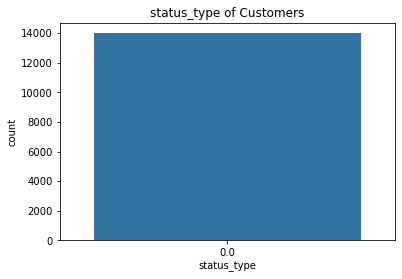

In [136]:
sns.countplot(data=df,x="status_type")
plt.title("status_type of Customers")
plt.show()


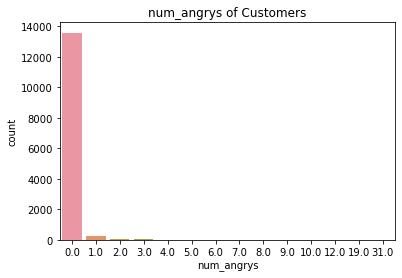

In [137]:
sns.countplot(data=df,x="num_angrys")
plt.title("num_angrys of Customers")
plt.show()

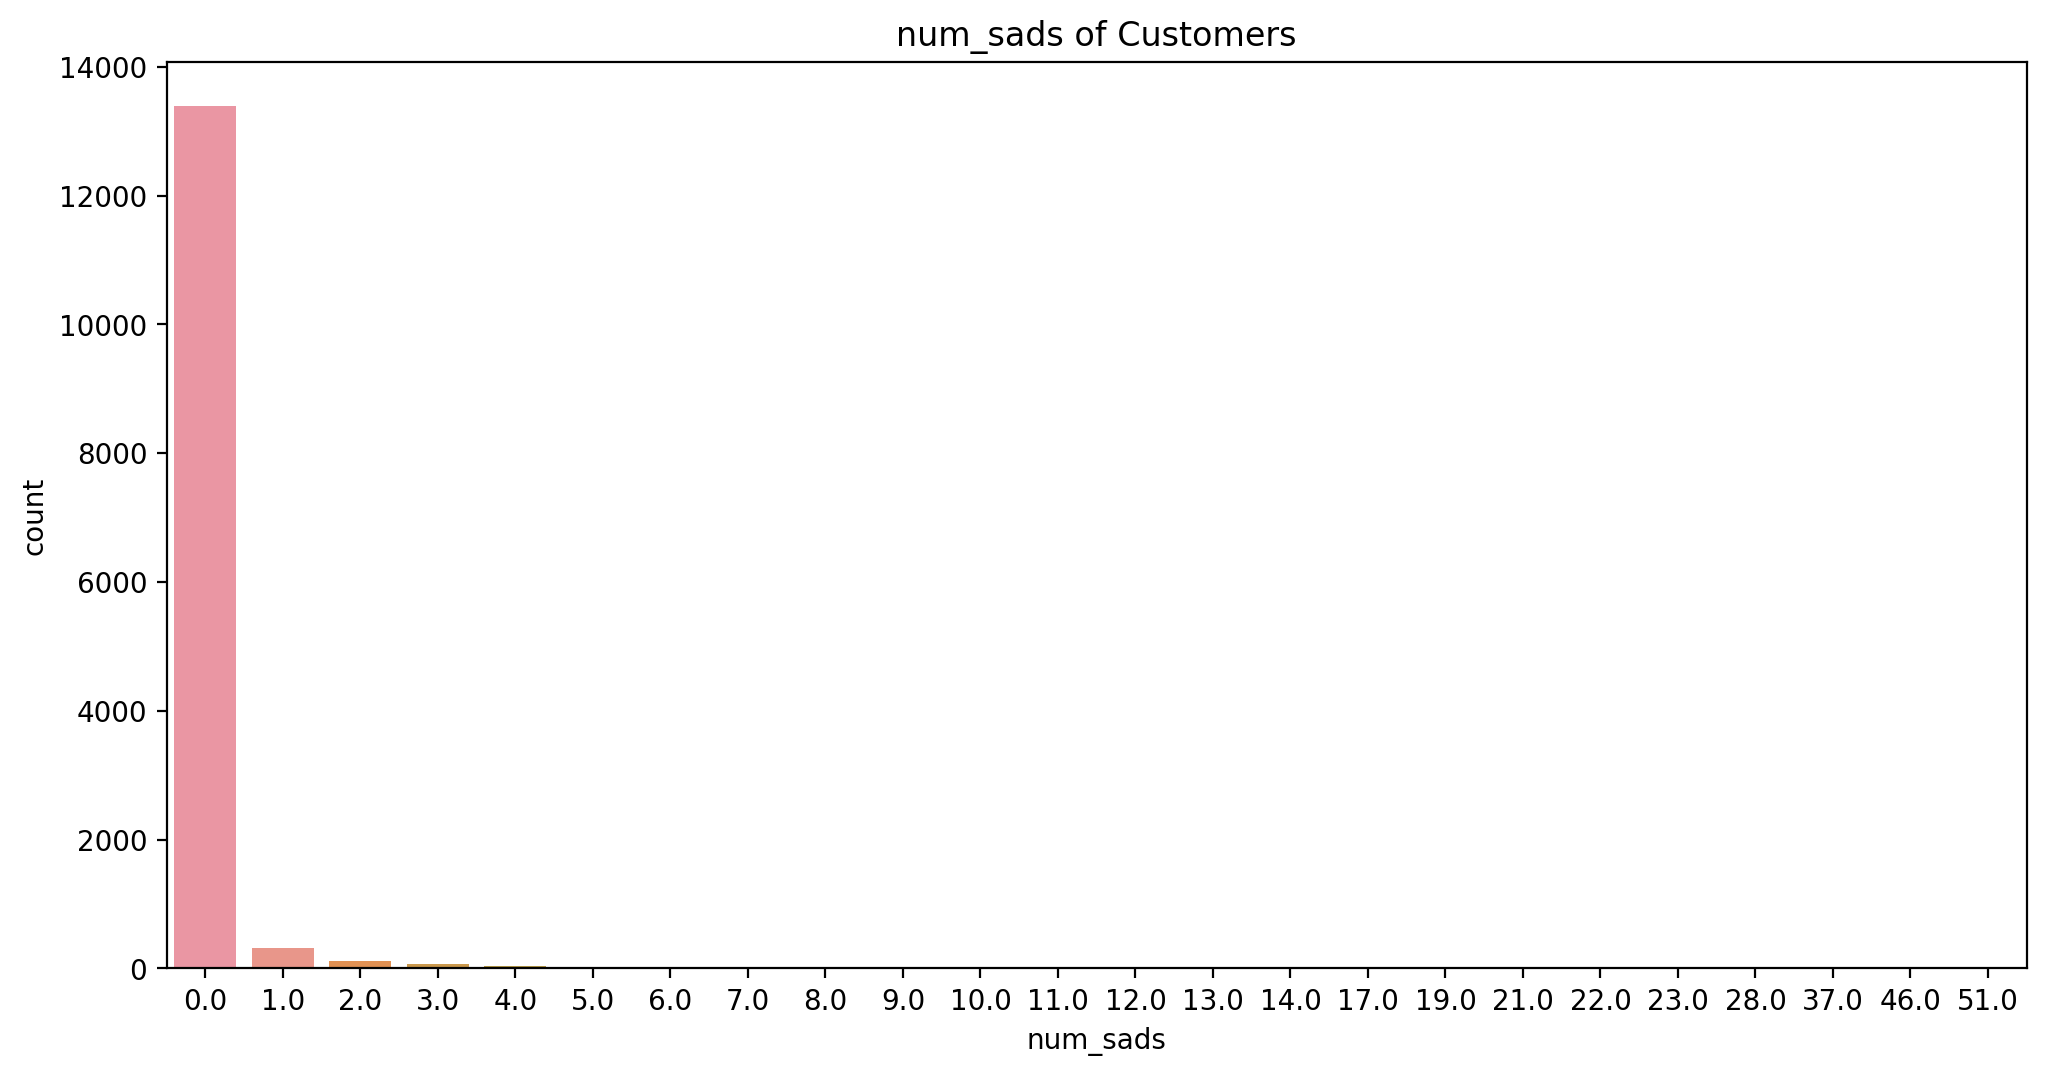

In [138]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="num_sads")
plt.title("num_sads of Customers")
plt.show()

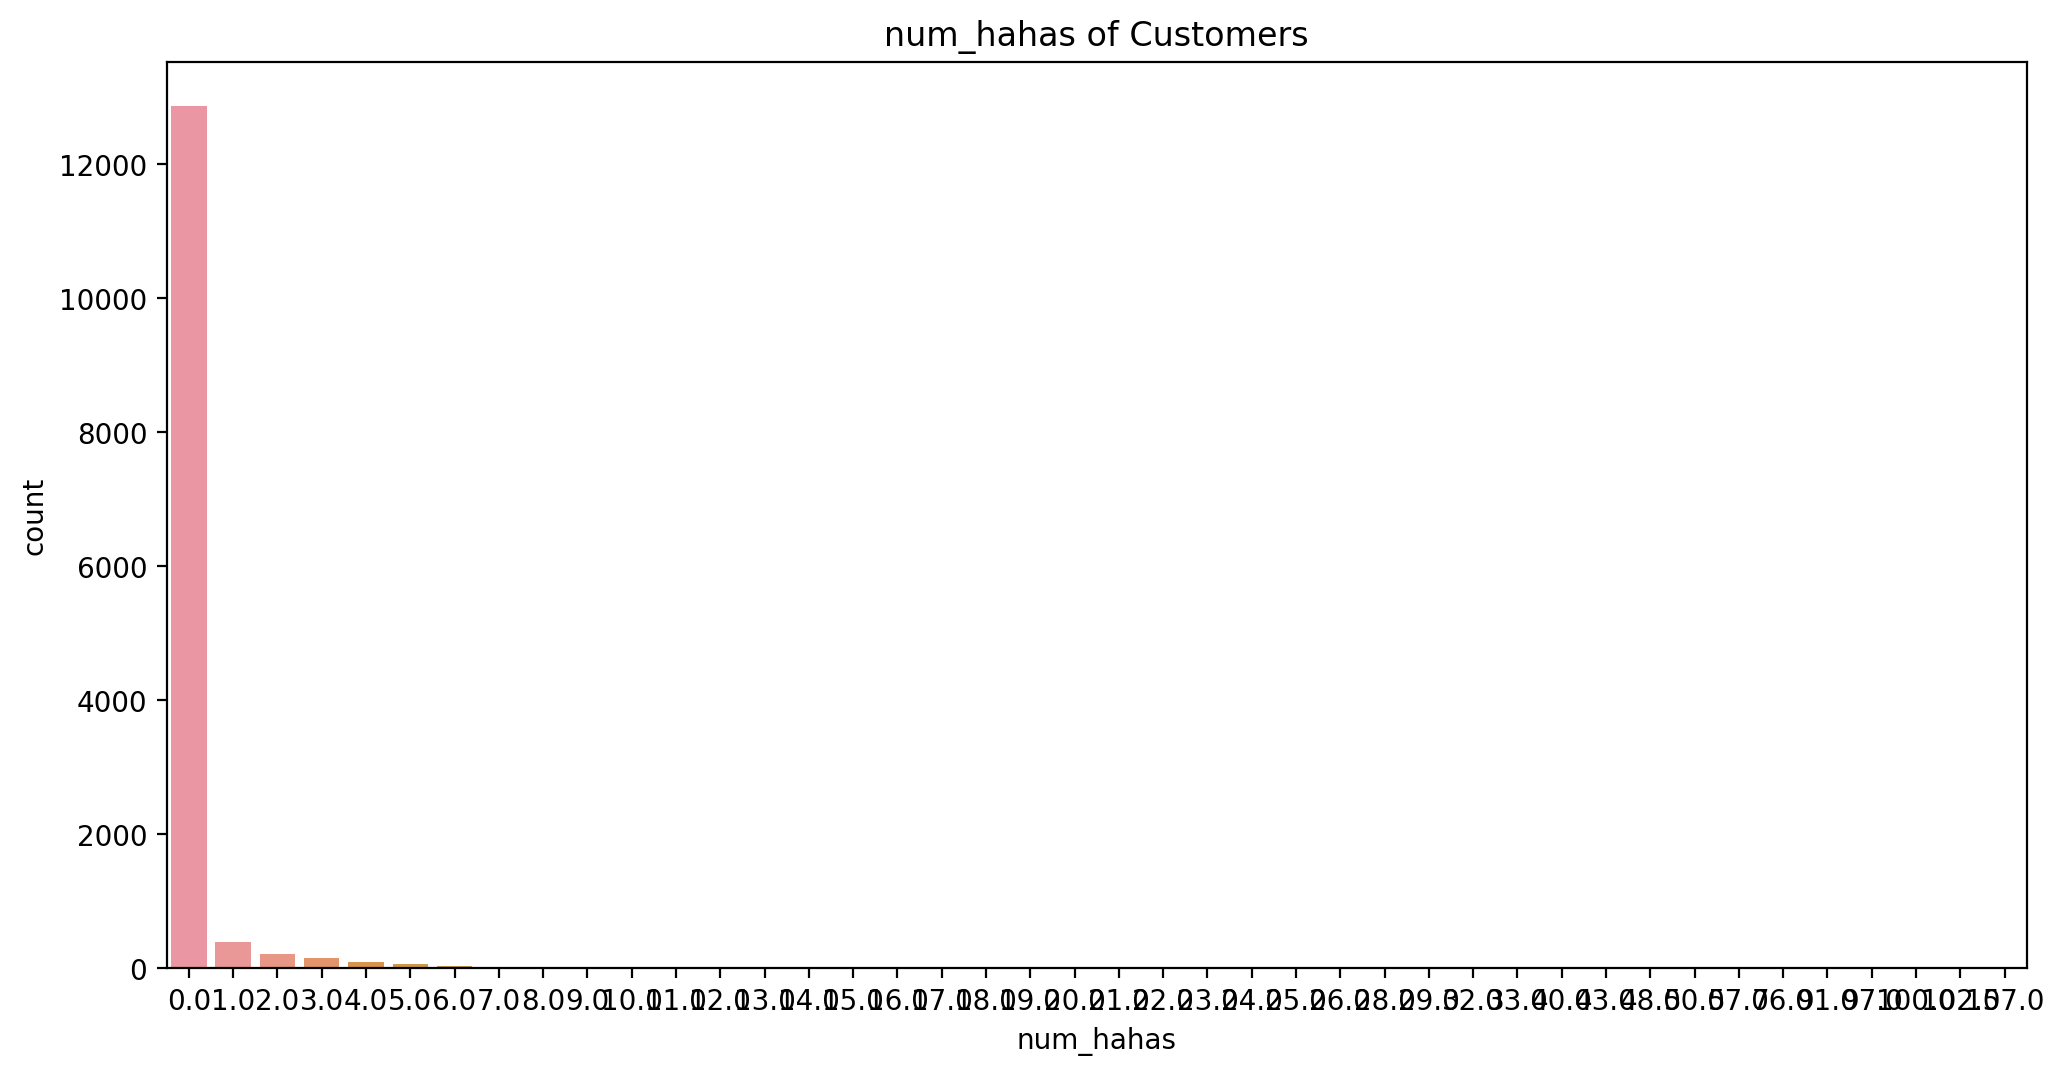

In [139]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="num_hahas")
plt.title("num_hahas of Customers")
plt.show()

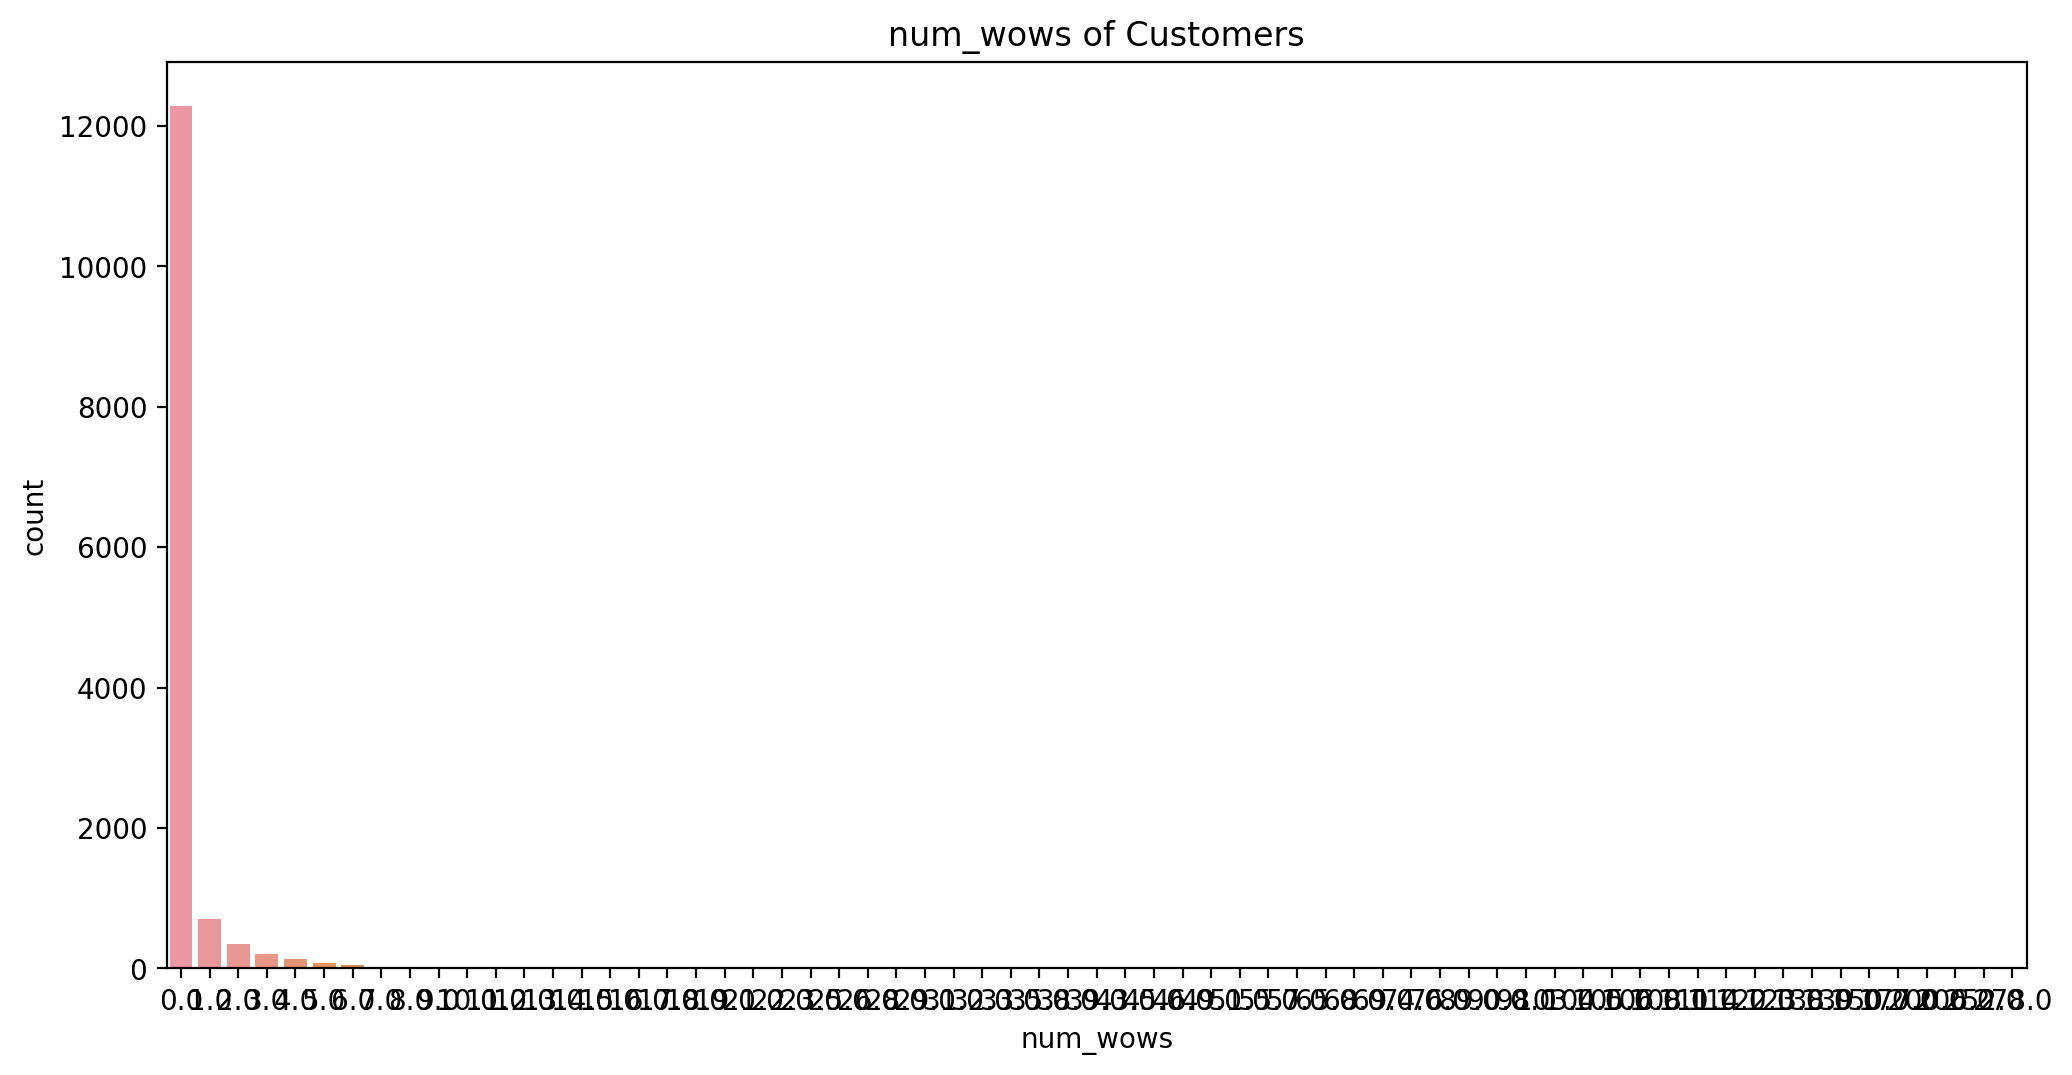

In [140]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="num_wows")
plt.title("num_wows of Customers")
plt.show()


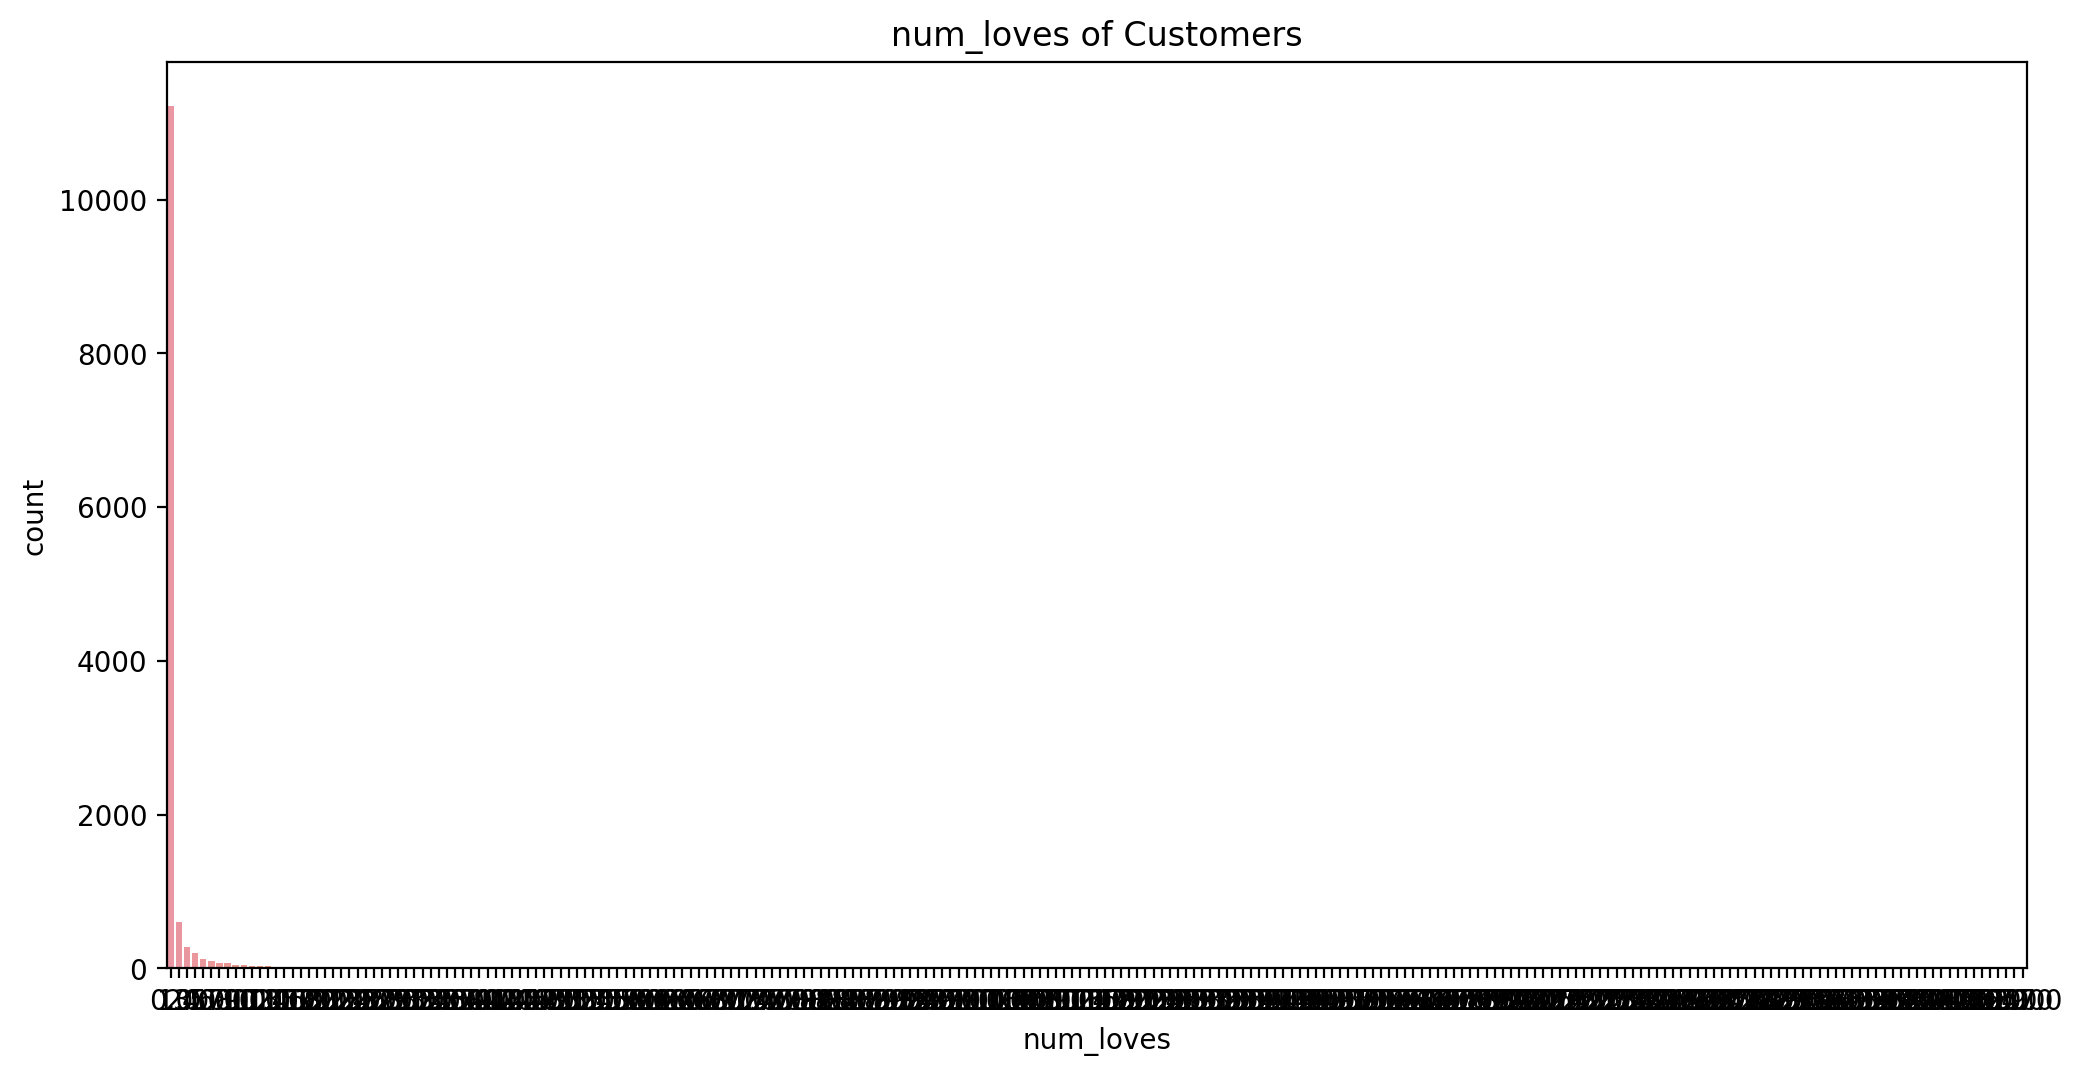

In [141]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="num_loves")
plt.title("num_loves of Customers")
plt.show()

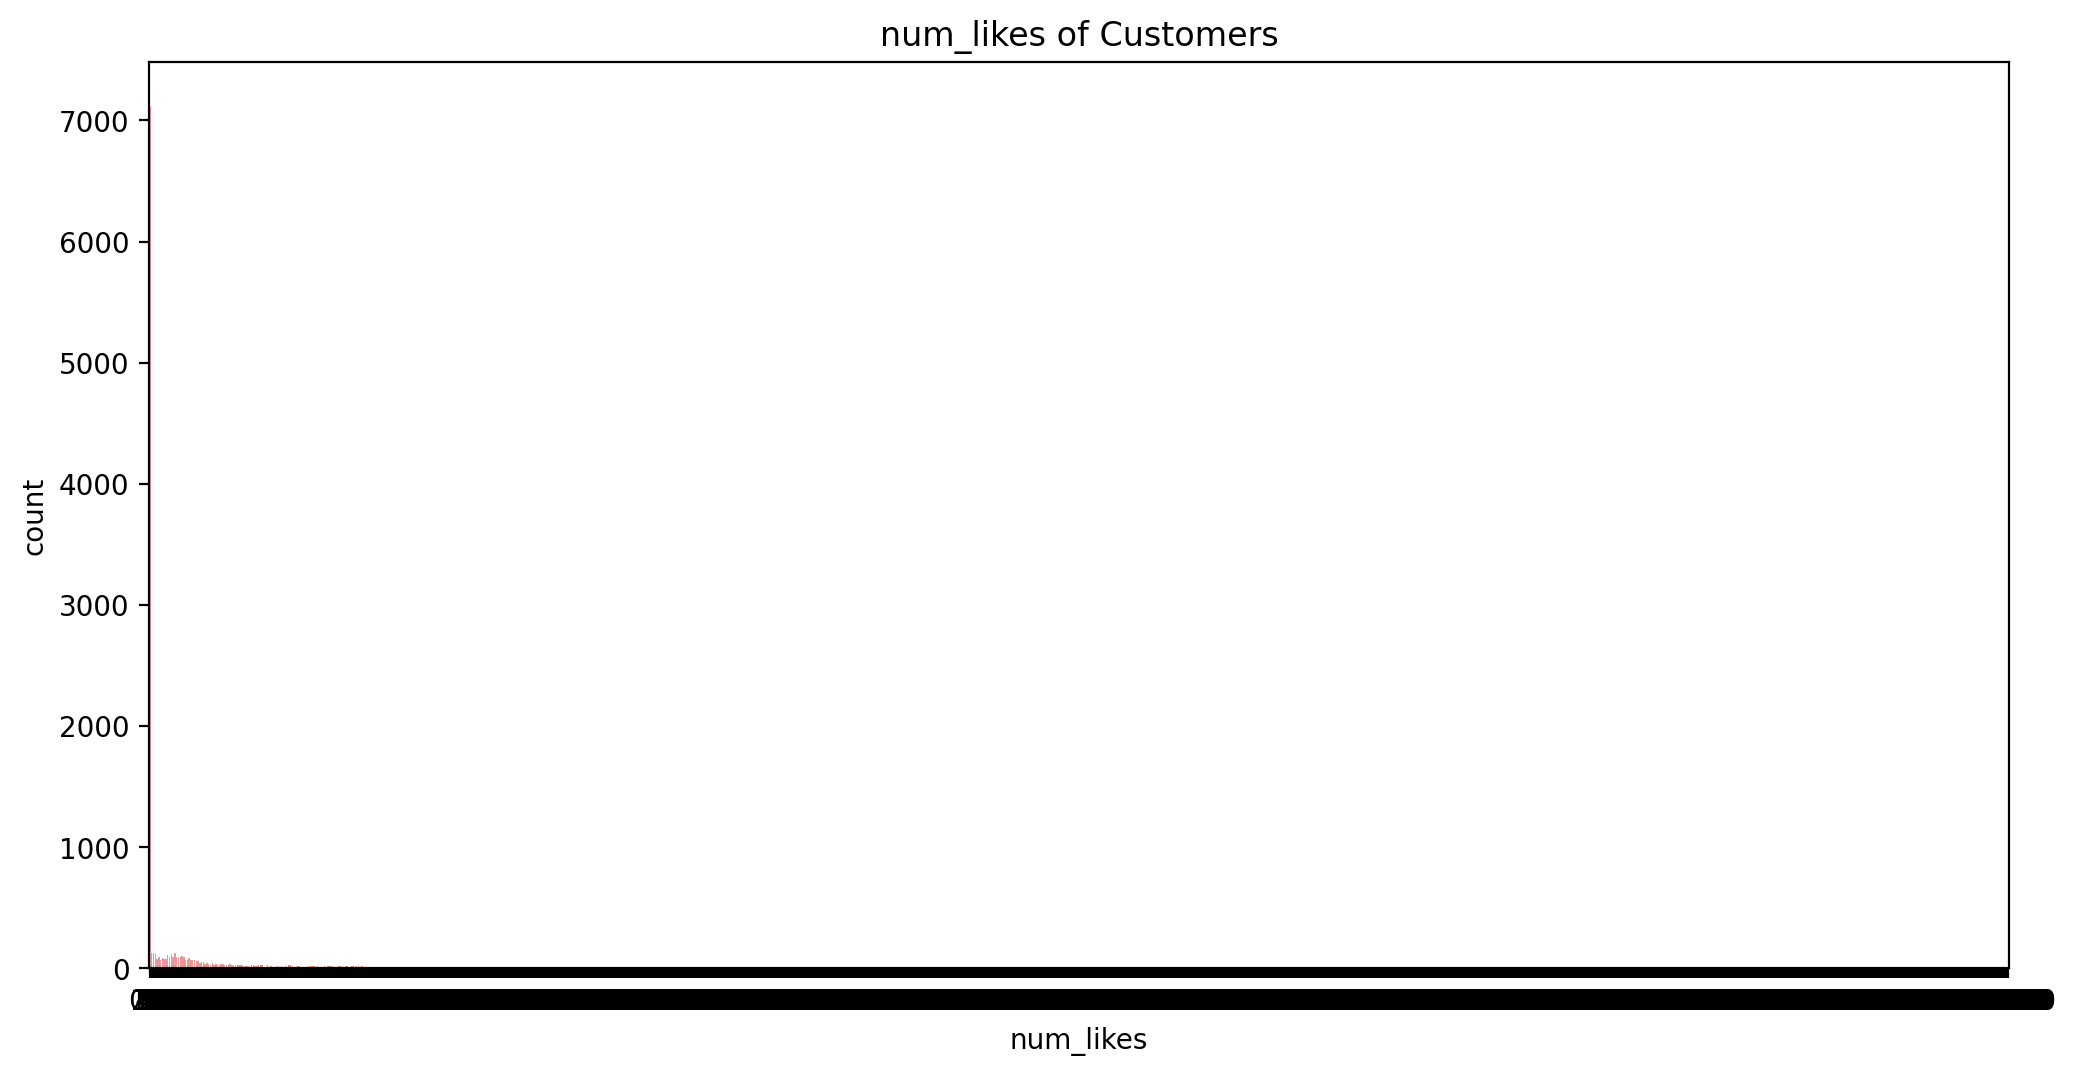

In [142]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="num_likes")
plt.title("num_likes of Customers")
plt.show()

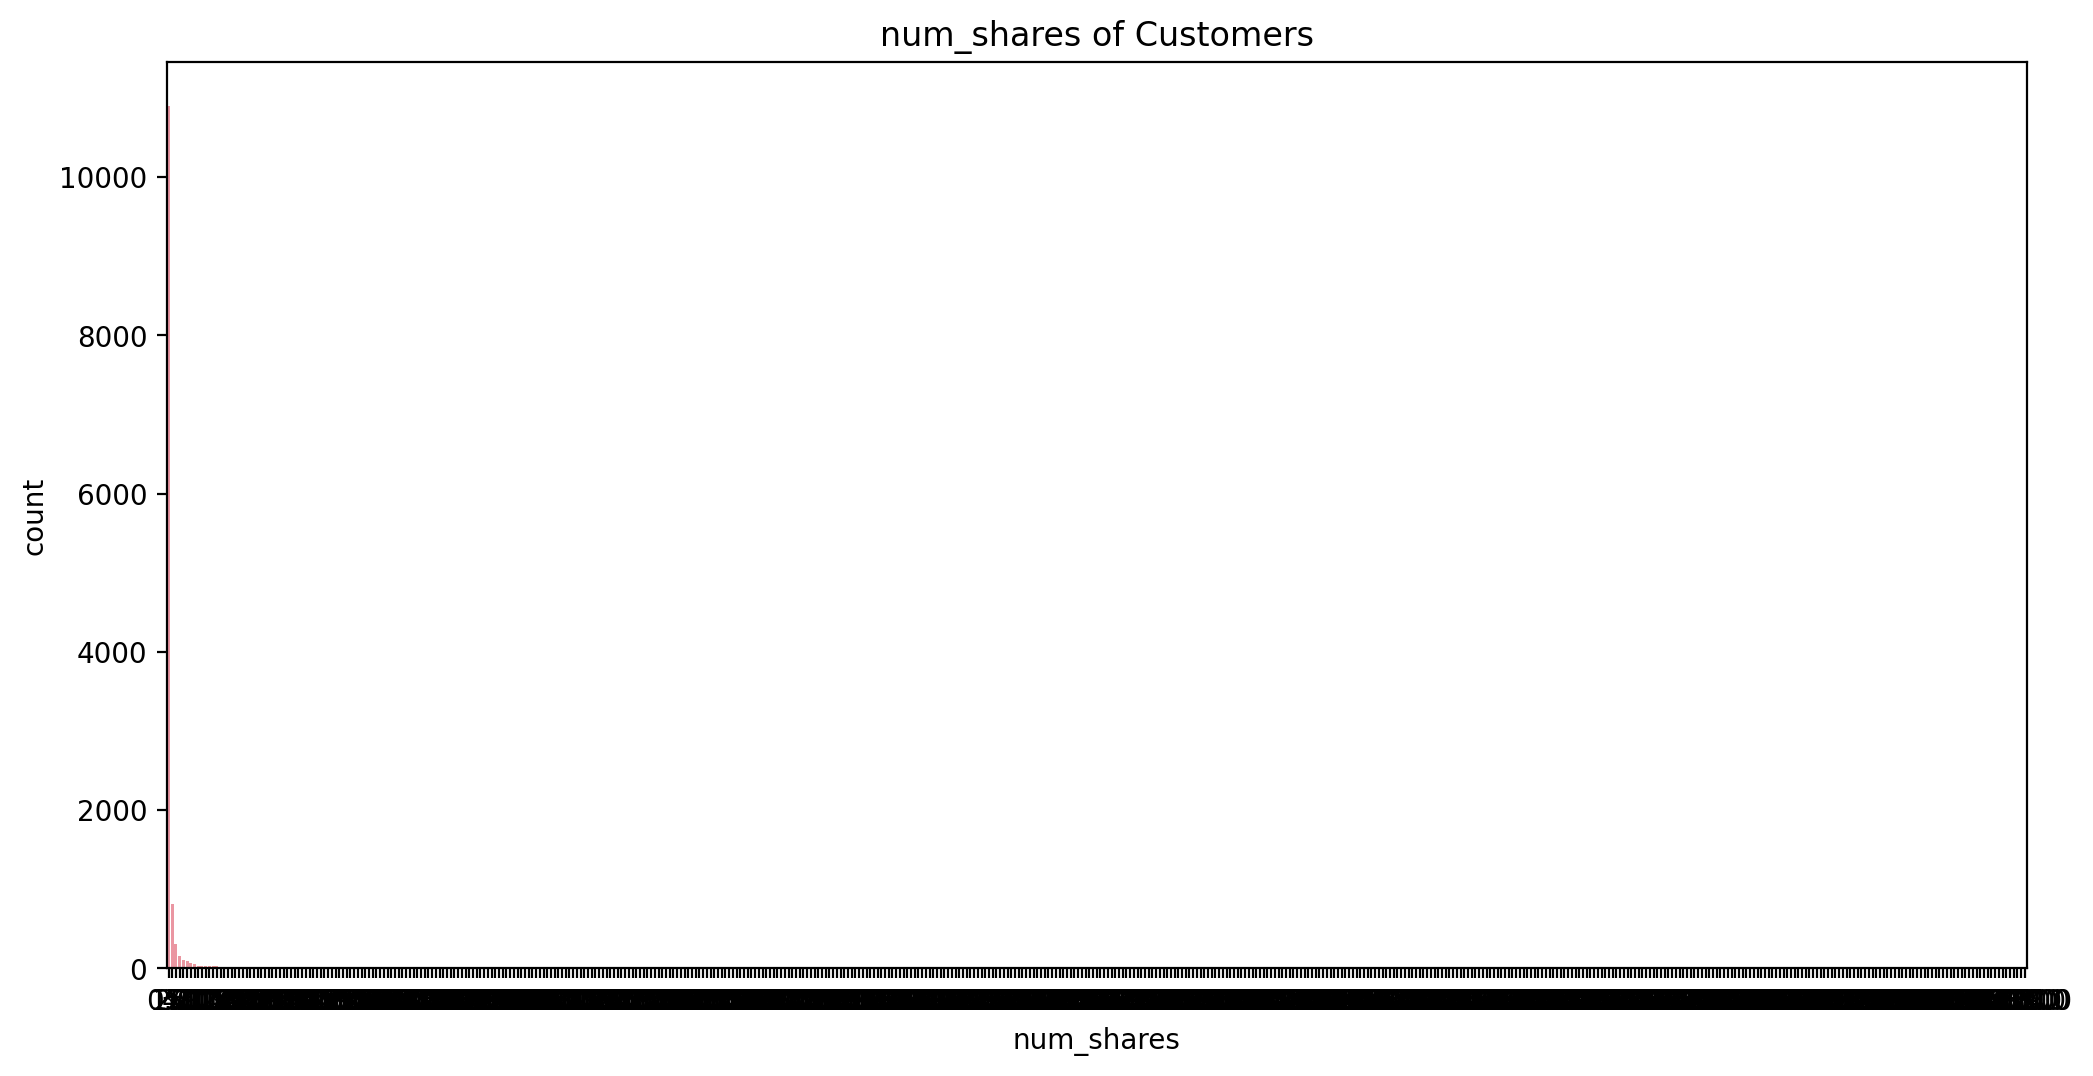

In [143]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="num_shares")
plt.title("num_shares of Customers")
plt.show()

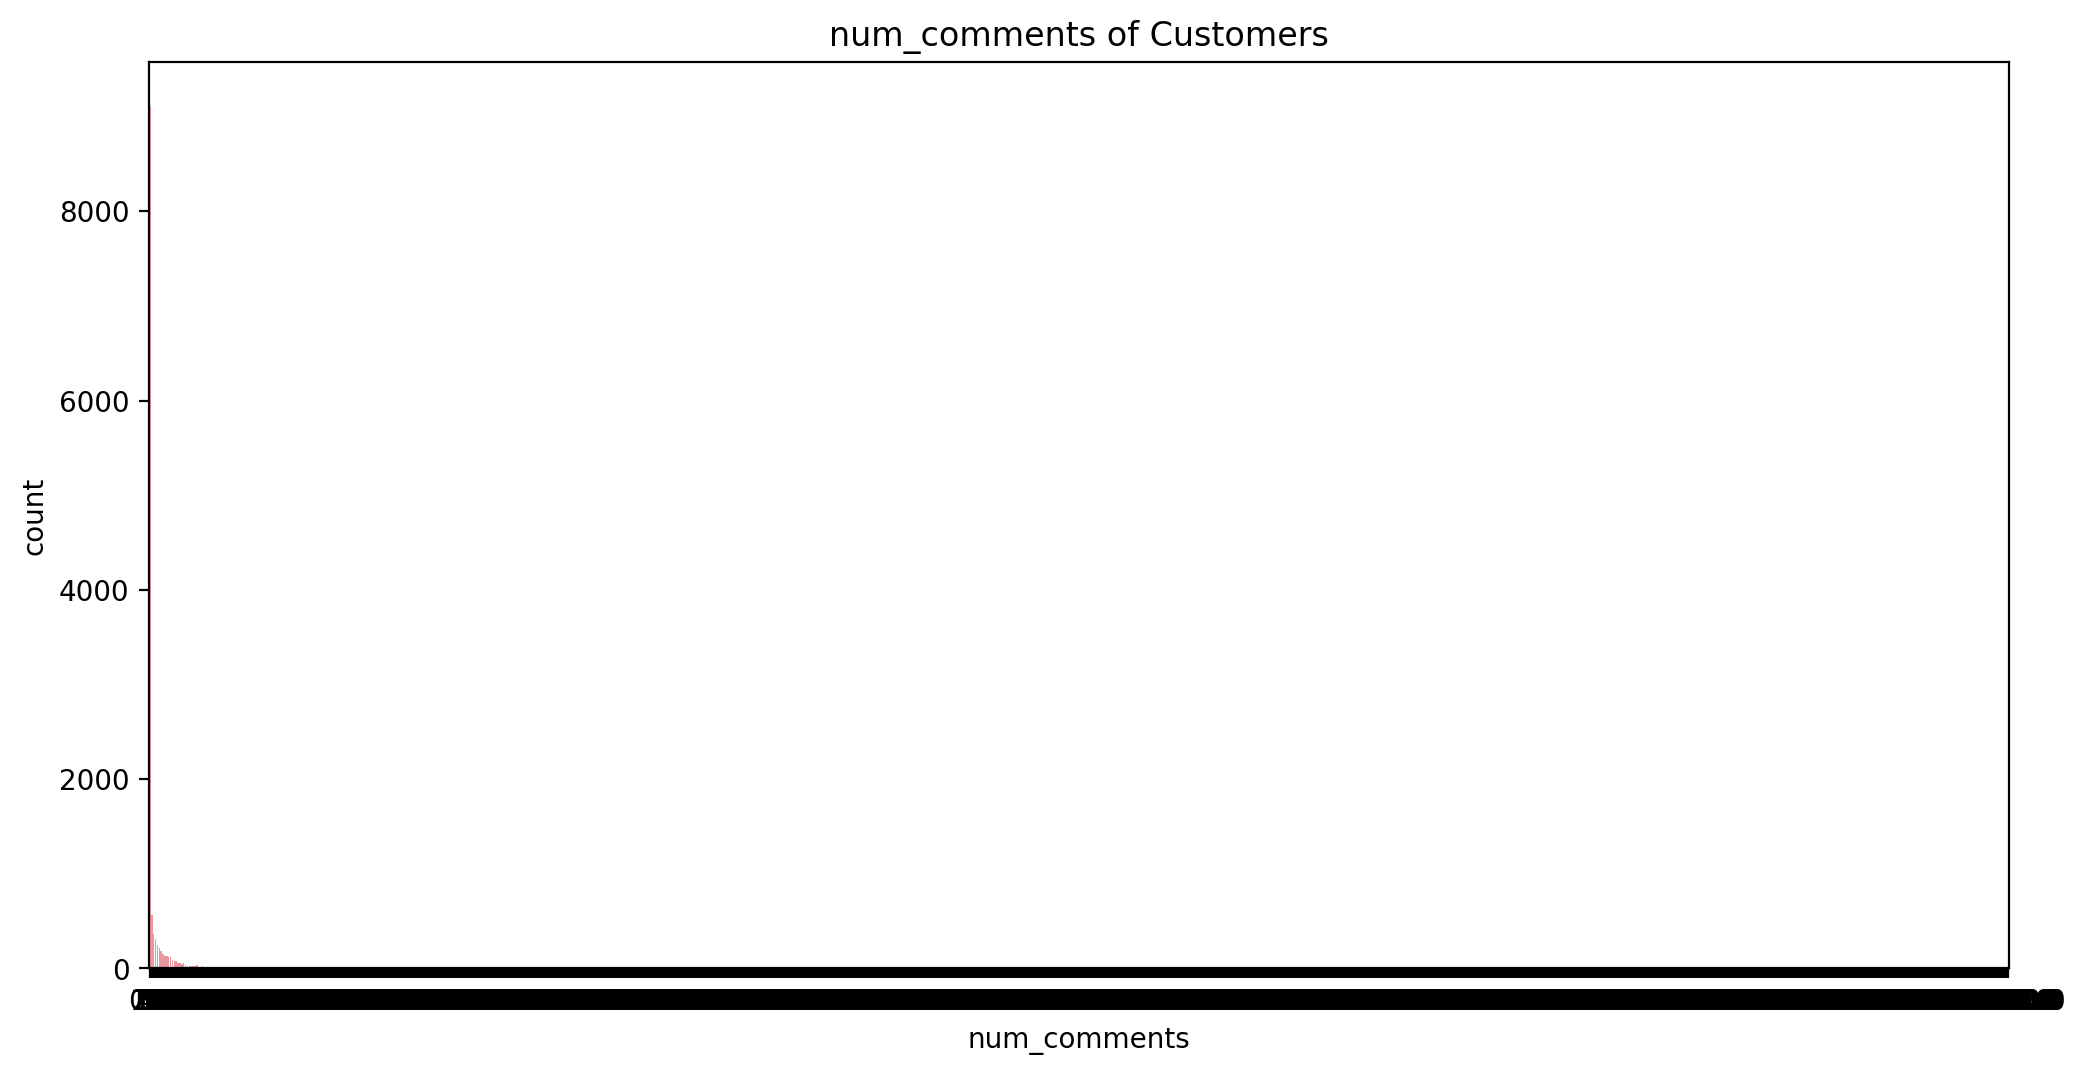

In [144]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x="num_comments")
plt.title("num_comments of Customers")
plt.show()

# From above graphs we can see data is highly scattered hence we need to normalize this and scale it to use it properly

# In order to understand the relationships between features, we will make a heatmap of correlations

import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

print(df.corr())
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True, figsize=(12, 10))
  
# displaying heatmap
mp.show()

In [145]:
#from sklearn.preprocessing import normalize
#data_scaled = normalize(df)
#data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
#data_scaled.head()

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled

array([[0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.22611725, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

# Now we will perform the clustering and assign the labels by using sklearn.
# First we will try ward linkage with euclidean distance

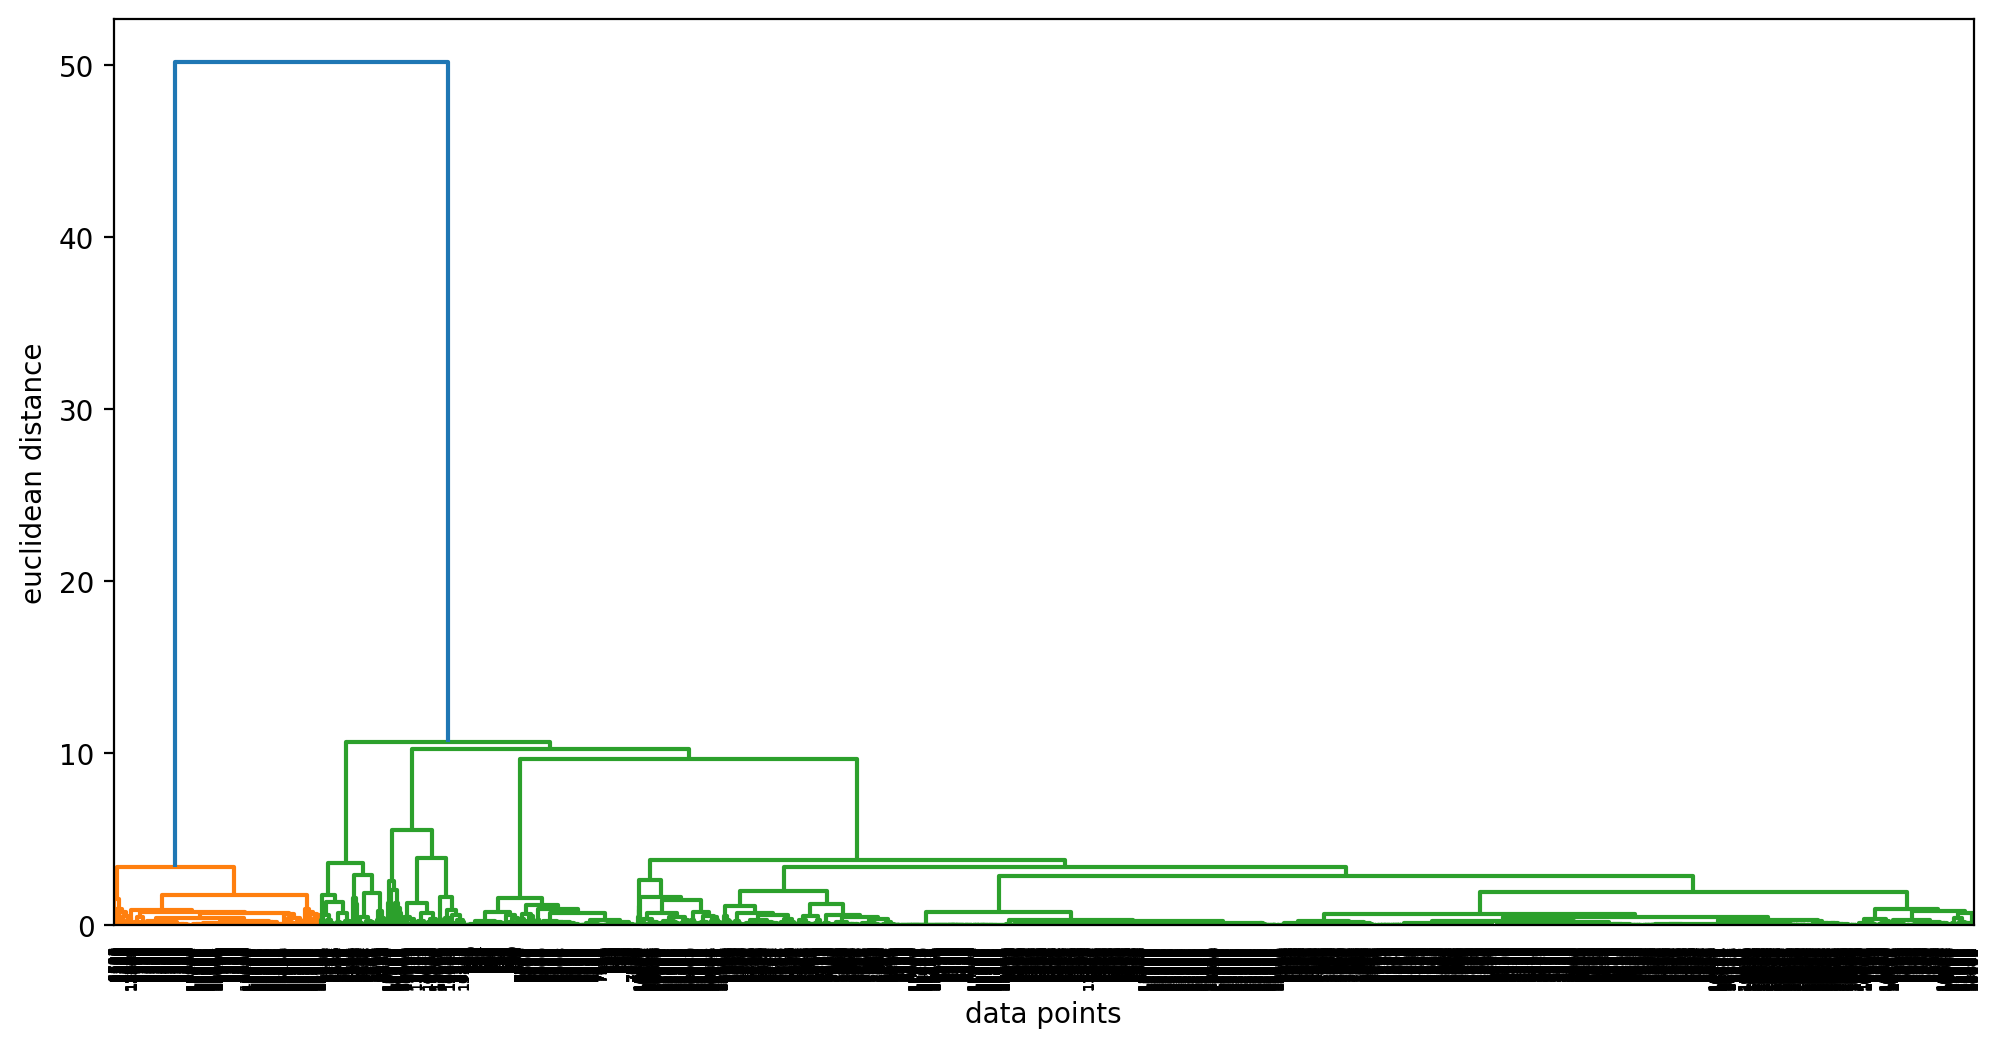

In [146]:
#potting dendogram
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize=(12,6),dpi=200)
merg =linkage(data_scaled,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [147]:
# we found number of n_clusters from this graph ---------------> it is 2

In [148]:
# Getting labels from Agglomearative Hierarchical clustering with affinity='euclidean', linkage='ward'
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(data_scaled)
hcluster_label = hcluster.labels_

hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,hcluster
0,246675545449582_1649696485147474,0.0,0.0,529.0,512.0,262.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,246675545449582_1649426988507757,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,246675545449582_1648730588577397,0.0,0.0,227.0,236.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,246675545449582_1648576705259452,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,246675545449582_1645700502213739,0.0,0.0,213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Visualization hcluster

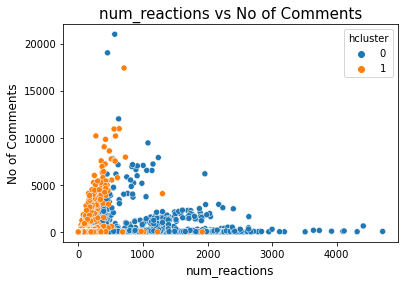

In [149]:
#visulazing hcluster1 results 
sns.scatterplot(hcluster_df['num_reactions'],hcluster_df['num_comments'],hue='hcluster',data=hcluster_df)
plt.title("num_reactions vs No of Comments", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("No of Comments", fontsize=12)
plt.show()



# Lets  try with Single linkage with euclidean distance

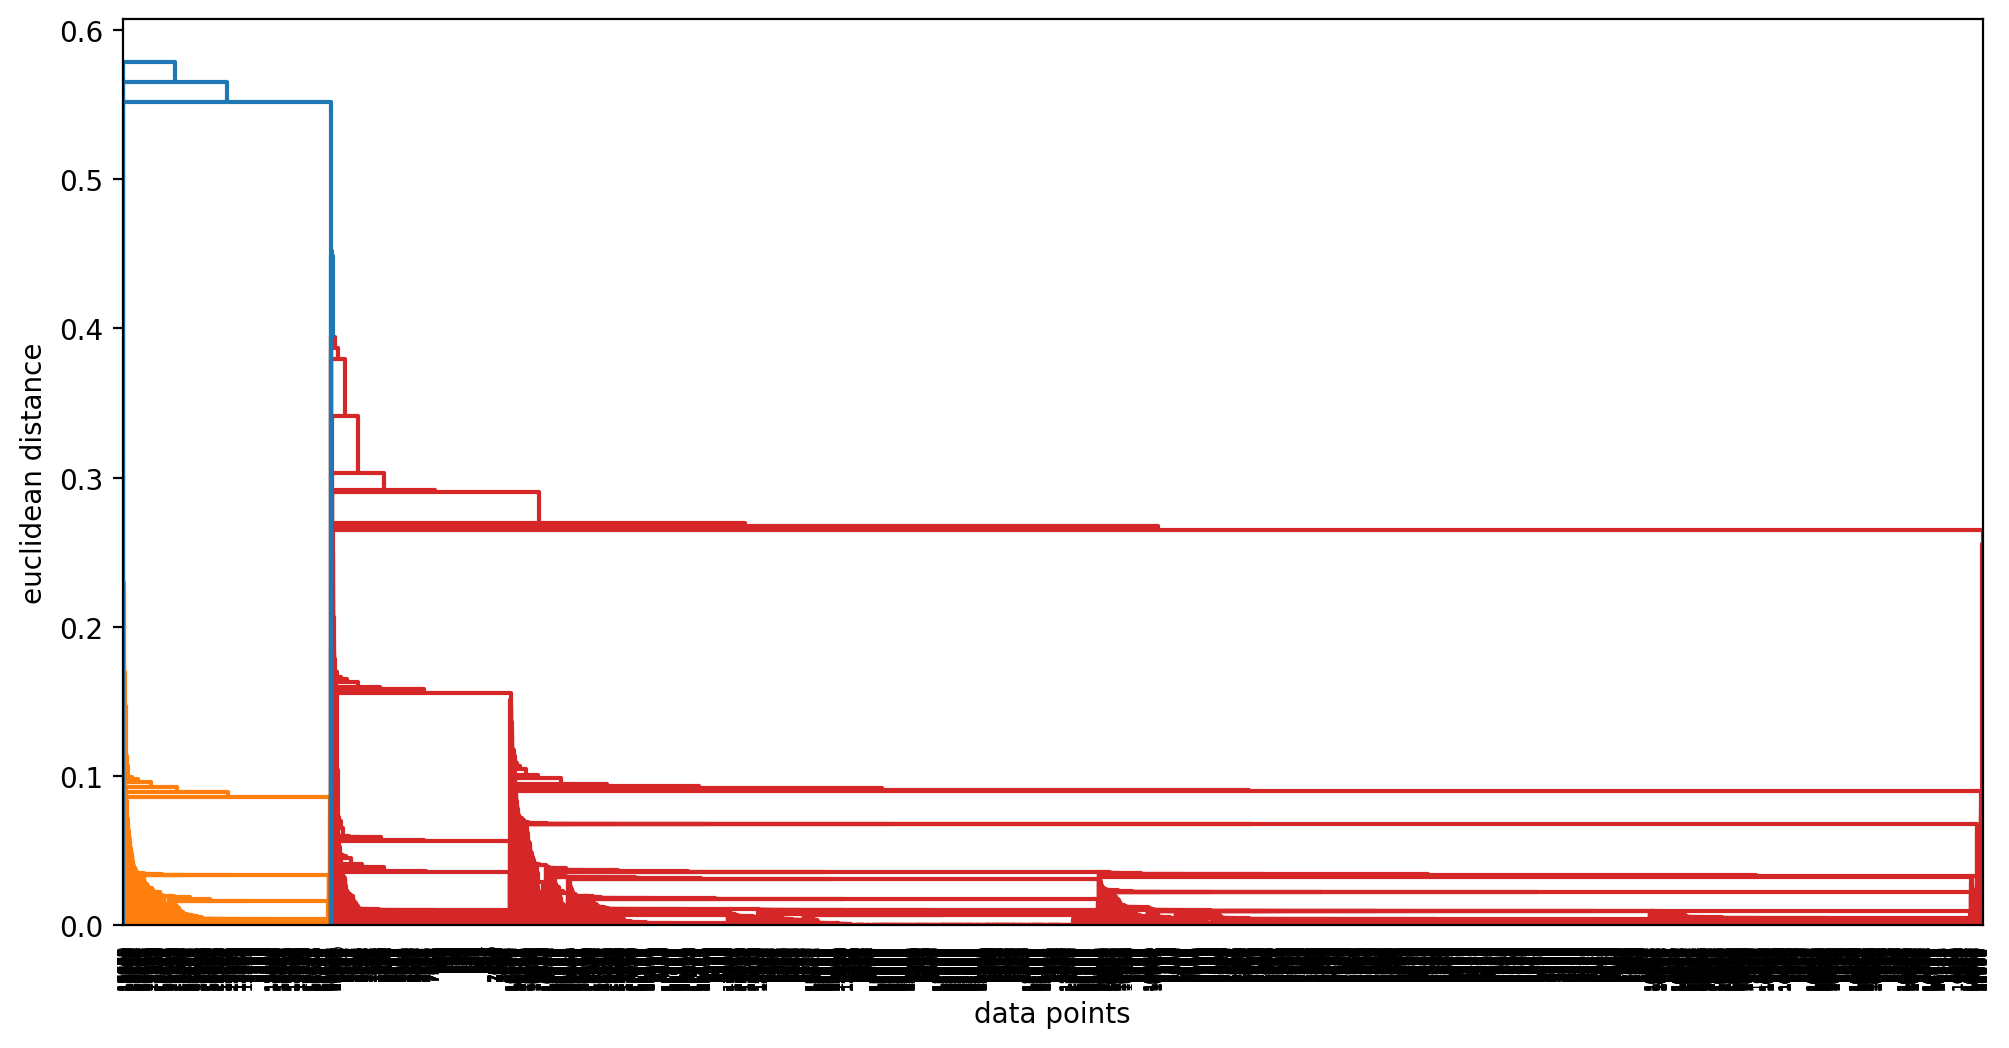

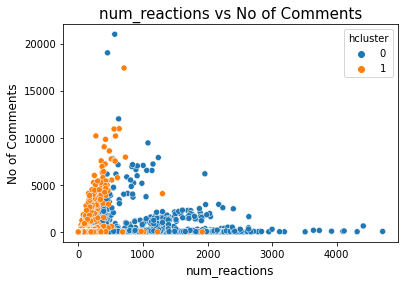

In [150]:
#potting dendogram
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize=(12,6),dpi=200)
merg =linkage(data_scaled,method="single")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

# Getting labels from Agglomearative Hierarchical clustering with affinity='euclidean', linkage='ward'
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(data_scaled)
hcluster_label = hcluster.labels_

hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label

#visulazing hcluster1 results 
sns.scatterplot(hcluster_df['num_reactions'],hcluster_df['num_comments'],hue='hcluster',data=hcluster_df)
plt.title("num_reactions vs No of Comments", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("No of Comments", fontsize=12)
plt.show()


# Lets try with average linkage with euclidean distance

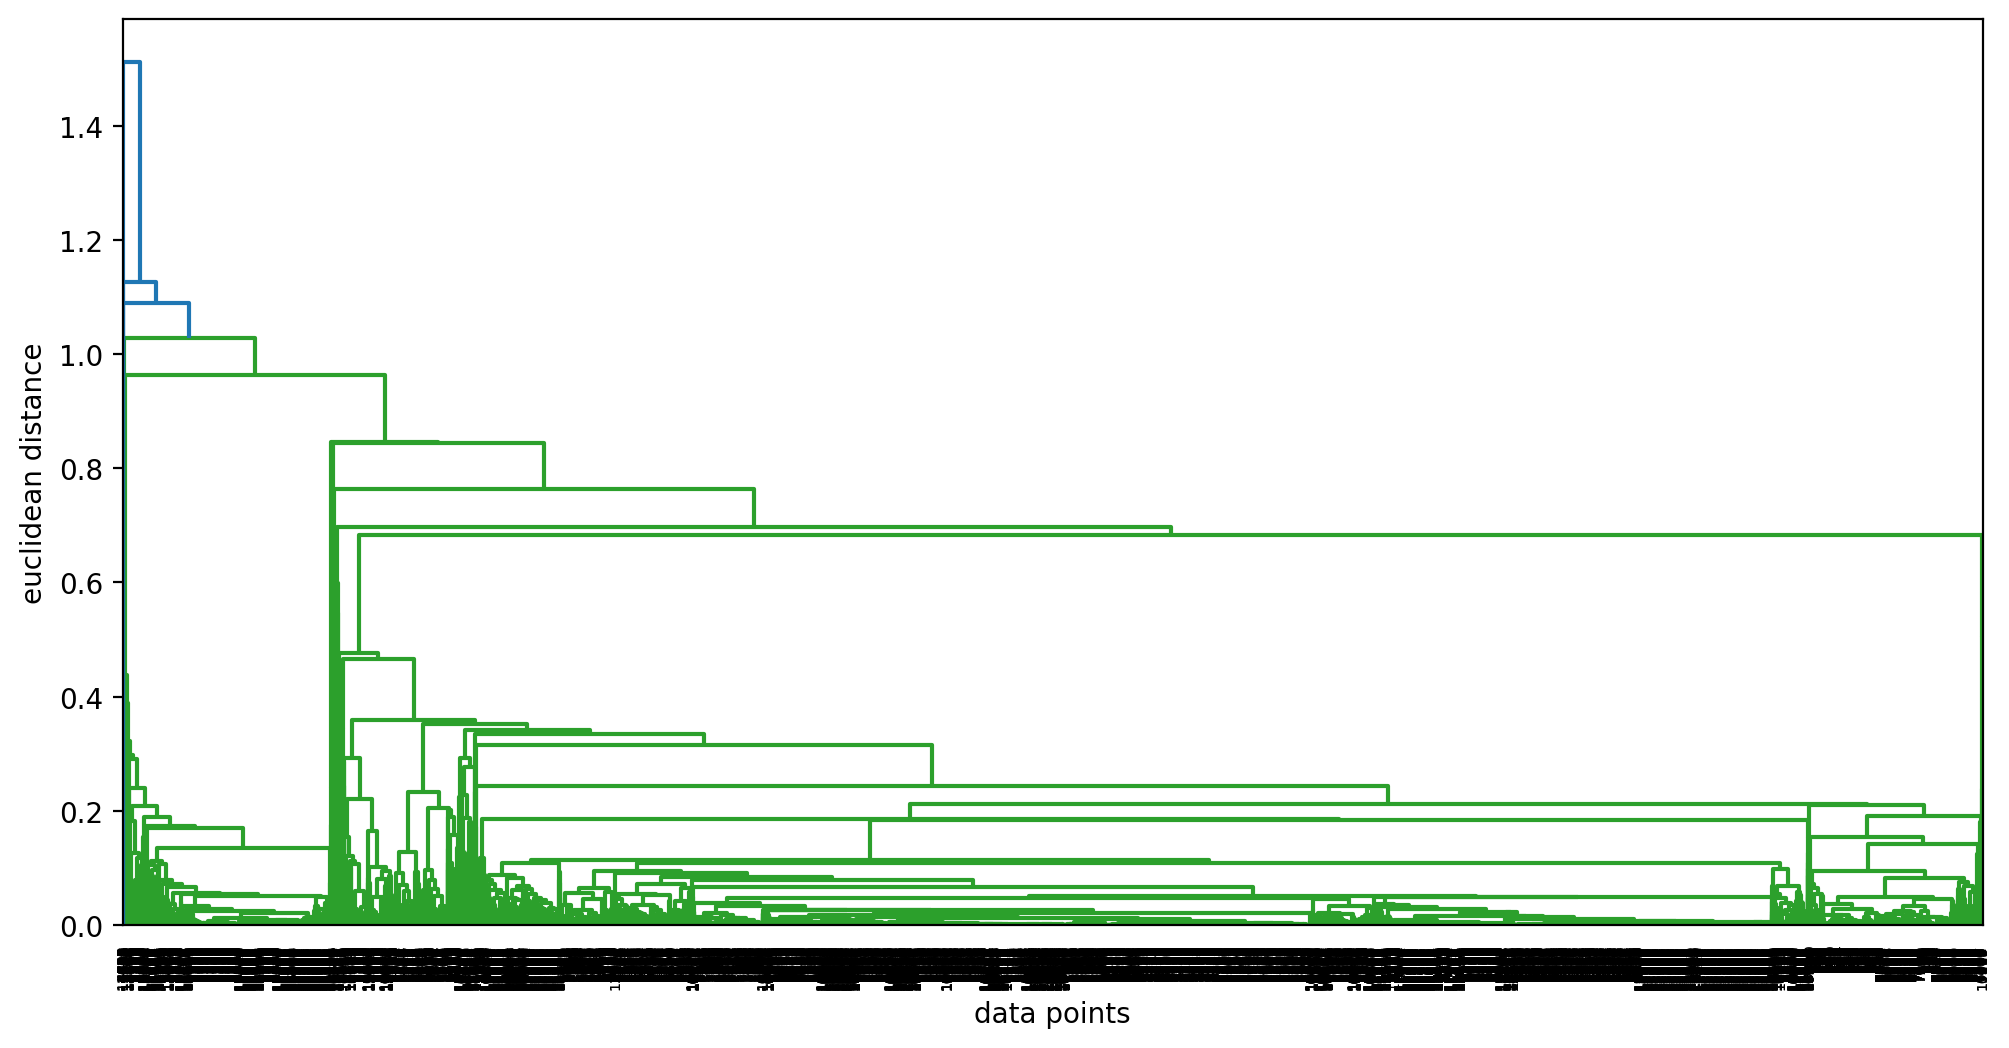

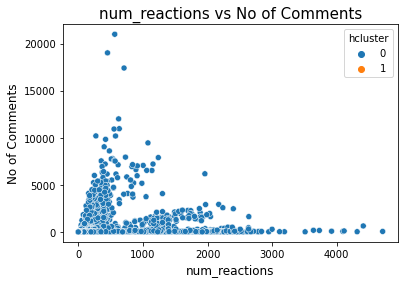

In [151]:
#potting dendogram
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize=(12,6),dpi=200)
merg =linkage(data_scaled,method="average")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

# Getting labels from Agglomearative Hierarchical clustering with affinity='euclidean', linkage='ward'
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
hcluster.fit_predict(data_scaled)
hcluster_label = hcluster.labels_

hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label

#visulazing hcluster1 results 
sns.scatterplot(hcluster_df['num_reactions'],hcluster_df['num_comments'],hue='hcluster',data=hcluster_df)
plt.title("num_reactions vs No of Comments", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("No of Comments", fontsize=12)
plt.show()


# Lets try with complete linkage with euclidean distance

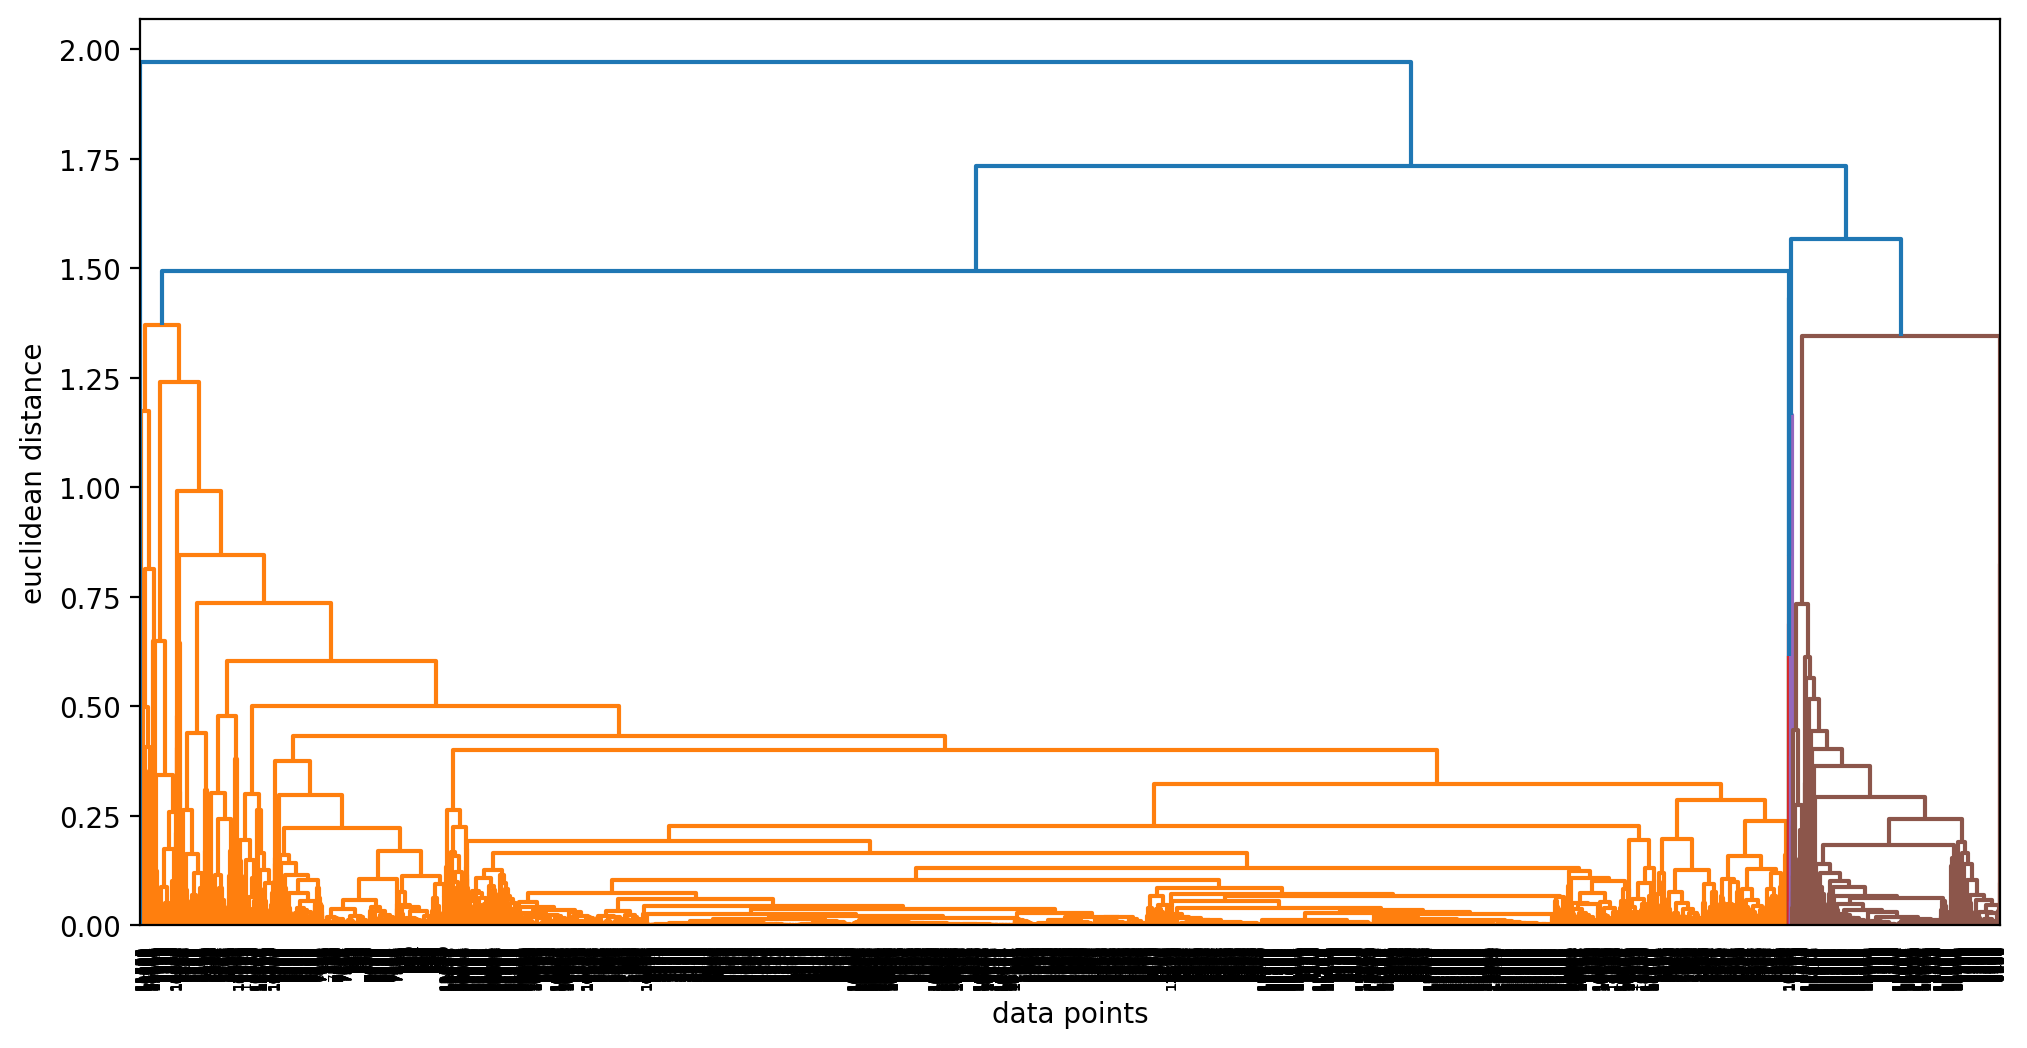

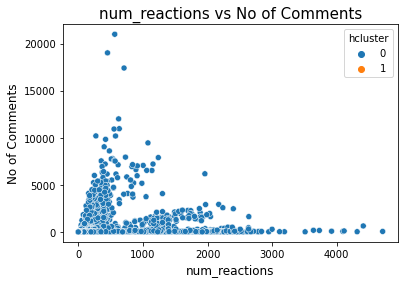

In [152]:
#potting dendogram
from scipy.cluster.hierarchy import linkage,dendrogram
plt.figure(figsize=(12,6),dpi=200)
merg =linkage(data_scaled,method="complete")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

# Getting labels from Agglomearative Hierarchical clustering with affinity='euclidean', linkage='ward'
hcluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
hcluster.fit_predict(data_scaled)
hcluster_label = hcluster.labels_

hcluster_df = pd.DataFrame(df)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label

#visulazing hcluster1 results 
sns.scatterplot(hcluster_df['num_reactions'],hcluster_df['num_comments'],hue='hcluster',data=hcluster_df)
plt.title("num_reactions vs No of Comments", fontsize=15)
plt.xlabel("num_reactions", fontsize=12)
plt.ylabel("No of Comments", fontsize=12)
plt.show()


# Agglomerative clustering Manhattan distance

In [ ]:
clustering = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='complete').fit(data_scaled)
clustering.labels_

# Agglomerative clustering cosine distance

In [ ]:
clustering = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete').fit(data_scaled)
clustering.labels_

# Agglomerative clustering euclidean distance

In [ ]:
clustering = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete').fit(data_scaled)
clustering.labels_

In [ ]:
clustering = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='complete').fit(data_scaled)
clustering.labels_